# Monte Carlo methods

In [2]:
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

## $\pi$ calculation

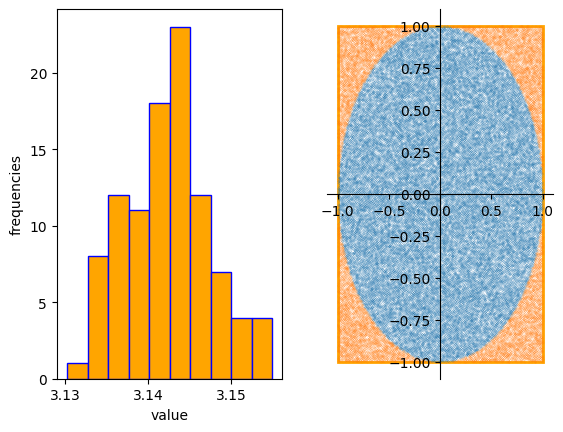

In [7]:
%matplotlib inline

n = 100000
N = 100

pis = []

# pi calculation
for _ in range(N):
    numerator = 0
    for _ in range(n):
        x, y = random.uniform(0, 1), random.uniform(0, 1)

        if x**2 + y**2 < 1:
            numerator += 1

    pis.append(4 * numerator / n)

# dots for plot
dotsout = []
dotsin  = []
for _ in range(n):
    x, y = random.uniform(-1, 1), random.uniform(-1, 1)
    if x**2 + y**2 <= 1:
        dotsin.append((x, y))
        continue
    dotsout.append((x, y))

# plotting
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(pis, lw=1, edgecolor="blue", facecolor="orange")

fig.set_label("Pi calculation")

ax[0].set_xlabel("value", position="right")
ax[0].set_ylabel("frequencies", position="top")


ax[1].add_patch(Polygon([[1, 1], [-1, 1], [-1, -1], [1, -1]],
                    edgecolor="orange",
                    facecolor="white",
                    lw=2
))

ax[1].scatter([x[0] for x in dotsin],  [y[1] for y in dotsin],  s=0.005)
ax[1].scatter([x[0] for x in dotsout], [y[1] for y in dotsout], s=0.005)

ax[1].spines['left'].set_position(('data', 0))
ax[1].spines['bottom'].set_position(('data', 0))
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.show()

## $e$ calculation


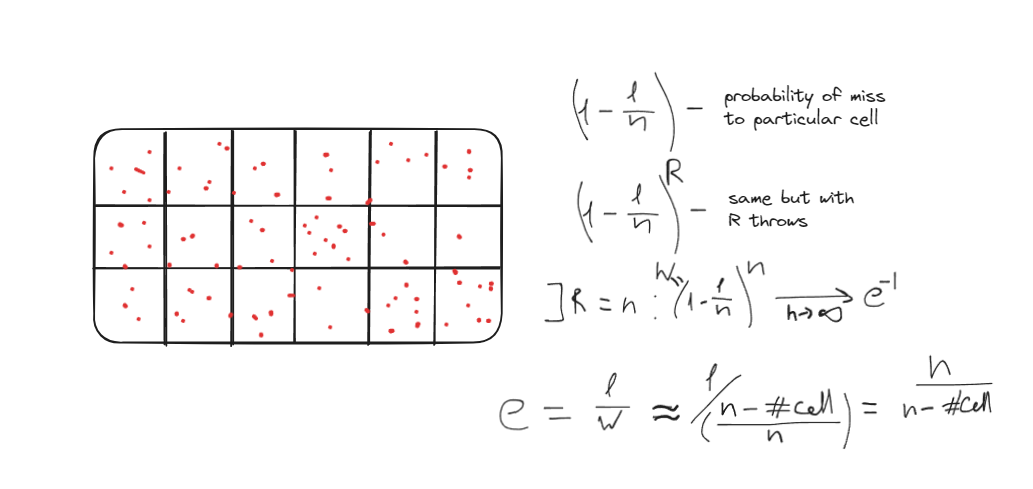


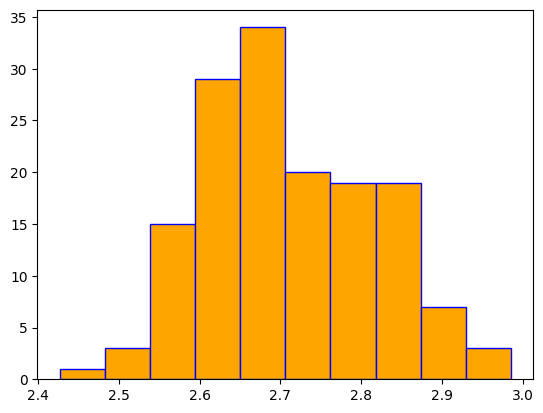

In [4]:
%matplotlib inline

n = 50

k, denom, n = 1000, 0, 100
N = 150
cell = random.randint(1, n)
es = []
for _ in range(N):
    denom = 0
    for _ in range(1, k):
        x = 0
        for _ in range(1, n):
            if random.randint(1, n) == cell:
                x += 1
                break
        if x == 0:
            denom += 1
    es.append(k / denom)
    
plt.hist(es, lw=1, edgecolor="blue", facecolor="orange")
plt.show()

__Another way:__

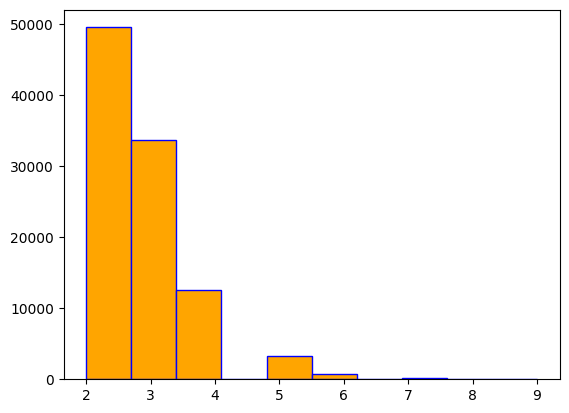

2.72343


In [31]:
n = 100000

res = []

for i in range(n):
    x = 0
    s = 0
    while x <= 1:
        s += 1
        x += random.random()
    res.append(s)

plt.hist(res, lw=1, edgecolor="blue", facecolor="orange")
plt.show()

print(sum(res) / n)

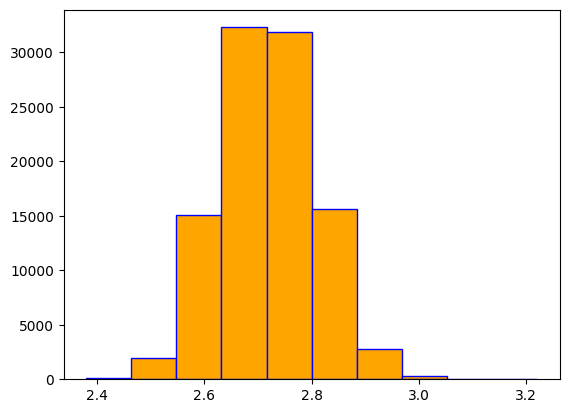

2.7182904


In [32]:
n = 100000
N = 100
res = []

for _ in range(n):
    a = []
    for _ in range(N):
        x = 0
        s = 0
        while x <= 1:
            s += 1
            x += random.random()
        a.append(s)

    res.append(sum(a) / N)

plt.hist(res, lw=1, edgecolor="blue", facecolor="orange")
plt.show()

print(sum(res) / n)

# Integral calculating with Monte-Carlo method

In [25]:
f = lambda x: np.log(1 + np.cos(x))

In [50]:
x, y = [], []
s = 0
a, b = 0, np.pi / 2
c, d = 0, 0.7
n = 20000

for _ in range(n):
    x0, y0 = random.uniform(a, b), random.uniform(c, d)
    x.append(x0)
    y.append(y0)
    if f(x0) > y0:
        s += 1

print((b - a) * (d - c) * s / n)

0.7413765963390213


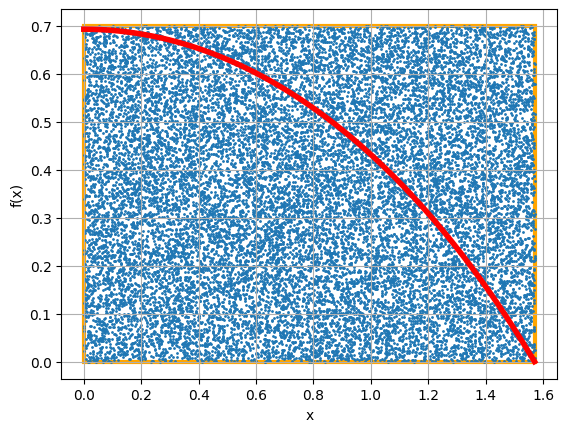

In [51]:
domain = np.arange(a, b, 0.01)

# plotting
fig = plt.figure()
ax = fig.add_subplot()

fig.set_label("Integral calculation")
ax.set_xlabel("x", position="right")
ax.set_ylabel("f(x)", position="top")

ax.add_patch(Polygon([[0, 0], [np.pi / 2, 0], [np.pi / 2, 0.7], [0, 0.7]],
                    edgecolor="orange",
                    facecolor="white",
                    lw=3
))
ax.scatter(x, y, s=1)
ax.plot(domain, f(domain), color="red", linewidth=4)
ax.grid()

plt.show()